you will implement linear regression with one variable to predict profits for a food truck.
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
outlet. 
The chain already has trucks in various cities and you have data for profits and populations from the cities

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import linear_model

The ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city.
A negative value for profit indicates a loss.

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
data[1]

In [81]:
m = data.shape[0]
x = data[:, 0]
y = data[:, 1]
x

Text(0,0.5,'food truck profit')

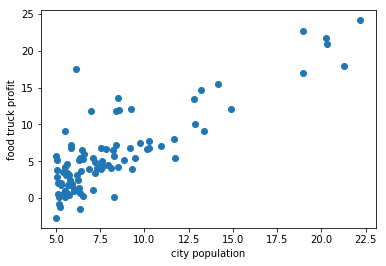

In [6]:
plt.scatter(x, y)
plt.xlabel('city population')
plt.ylabel('food truck profit')

In [90]:
x = x.reshape((x.shape[0],1))
ones = np.ones((x.shape[1], x.shape[0]))
x = np.vstack((ones, x.T)) # x is a (2, 97)
x.shape

(2, 97)

In [91]:
y = y.reshape((y.shape[0],1))
y = y.T
y.shape

(1, 97)

##  1) linear regression with sikitlearn

In [78]:
regr = linear_model.LinearRegression(fit_intercept=False, normalize=True)
regr.fit(x, y)
regr.coef_

array([[0.80252685]])

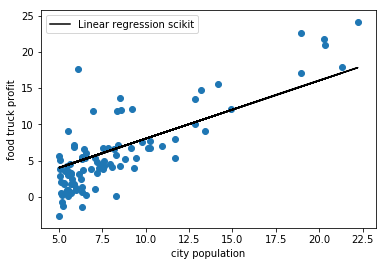

In [116]:
xaxis = x[1].reshape((x[1].shape[0], 1))
plt.plot(xaxis, np.dot(xaxis, regr.coef_), '-', color='black', label='Linear regression scikit')
plt.scatter(x[1], y)
plt.xlabel('city population')
plt.ylabel('food truck profit')
plt.legend()

## 2) Linear Regression with Gradient Descent (Regularized)

In [98]:
def cost(theta, x, y):
    m = x.shape[0]
    h = np.dot(theta.T, x)
    j = np.sum((h - y)**2)
    j *= (1/2*m)
    return j

In [92]:
def gradient_descent(x, y, learning_rate, iterations, lamda):
    # x and y are column vectros
    assert(x.shape[0] == 1)
    assert(y.shape[0] == 1)
    theta = np.random.rand(2,1)
    x_ = x.copy()
    y_ = y.copy()
    m = x_.shape[1]
    for cnt in range(iterations):
        h = np.dot(theta.T, x_)
        grad = np.dot(x_, (h-y_).T) / m         
        theta = theta *(1-(learning_rate*lamda)/m) - learning_rate * grad
    print(theta)
    return cost(theta, x_, y_)

In [73]:
costs1 = [gradient_descent(x, y, 0.02, iter, 0.1) for iter in range(100,2000,100)]
costs2 = [gradient_descent(x, y, 0.02, iter, 0.5) for iter in range(100,2000,100)]
costs3 = [gradient_descent(x, y, 0.02, iter, 0) for iter in range(100,2000,100)]

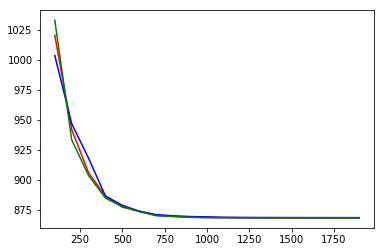

In [74]:
plt.plot(np.arange(100,2000,100), costs1, 'red')
plt.plot(np.arange(100,2000,100), costs2, 'blue')
plt.plot(np.arange(100,2000,100), costs3, 'green')

In [87]:
gradient_descent(x, y, 0.02, 500, 0.1)

[[-3.18843408]
 [ 1.12196294]]


877.3692919051972

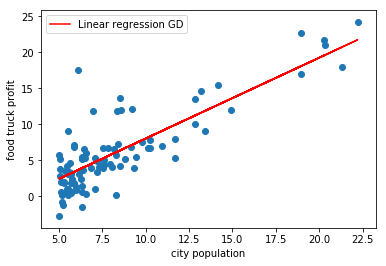

In [117]:
xaxis = x[1].reshape((x[1].shape[0], 1))
theta = np.array([[-3.18843408] ,[ 1.12196294]])
plt.plot(xaxis, np.dot(x.T, theta), '-', color='red', label='Linear regression GD')
plt.scatter(x[1], y)
plt.xlabel('city population')
plt.ylabel('food truck profit')
plt.legend()

## Linear Regression with Normal Equation

In [113]:
X = x.T 
theta_eq = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, y.T))
theta_eq

array([[-3.89578088],
       [ 1.19303364]])

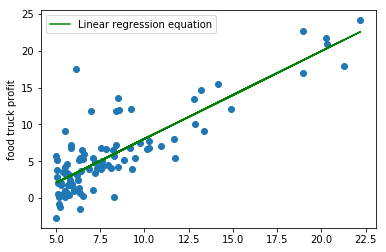

In [118]:
xaxis = x[1].reshape((x[1].shape[0], 1))
plt.scatter(x[1], y)
plt.plot(xaxis, np.dot(x.T, theta_eq), '-', color='green', label='Linear regression equation')
plt.ylabel('food truck profit')
plt.legend()

## All methods

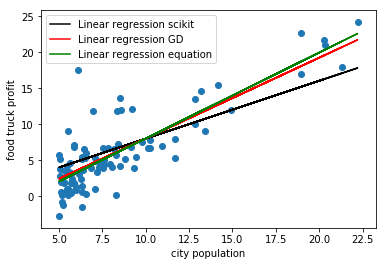

In [119]:
xaxis = x[1].reshape((x[1].shape[0], 1))
plt.plot(xaxis, np.dot(xaxis, regr.coef_), '-', color='black', label='Linear regression scikit')
theta = np.array([[-3.18843408] ,[ 1.12196294]])
plt.plot(xaxis, np.dot(x.T, theta), '-', color='red', label='Linear regression GD')
plt.scatter(x[1], y)
plt.plot(xaxis, np.dot(x.T, theta_eq), '-', color='green', label='Linear regression equation')
plt.xlabel('city population')
plt.ylabel('food truck profit')
plt.legend()